In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

## 1. Load data and EDA

In [3]:
path = kagglehub.dataset_download("elikplim/eergy-efficiency-dataset")

files = os.listdir(path)
print(files)

['ENB2012_data.csv']


In [4]:
columns = [
    "Relative Compactness",
    "Surface Area",
    "Wall Area",
    "Roof Area",
    "Overall Height",
    "Orientation",
    "Glazing Area",
    "Glazing Area Distribution",
    "Heating Load",
    "Cooling Load"
]

In [5]:
filepath = os.path.join(path, 'ENB2012_data.csv')
data = pd.read_csv(filepath, names=columns)
data = data.drop(index=0).reset_index(drop=True)
data = data.apply(pd.to_numeric)

data.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
print("Shape: ", data.shape)

data.info()

Shape:  (768, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
data.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


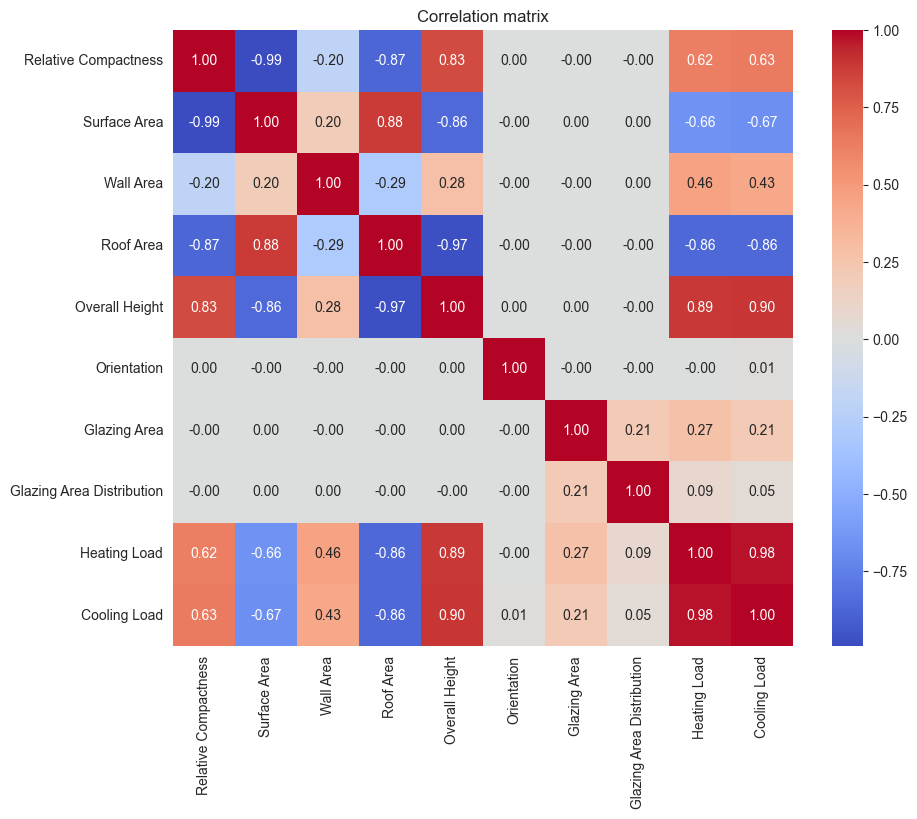

In [9]:
# Correlations

plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix")
plt.show()

## 2. Split data

In [10]:
X = data.drop(columns=["Heating Load", "Cooling Load"])
y = data["Heating Load"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [11]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (614, 8)
Test shape:  (154, 8)


## 3. Baseline: linear regression

In [12]:
baseline_model = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

baseline_model.fit(X_train, y_train)

,steps,"[('scaler', ...), ('linear_regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [13]:
# Predictions and evaluations

y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [14]:
print("Linear regression results:\n")
print(f"Train RMSE: {train_rmse}; Test RMSE: {test_rmse}")
print(f"Train R2: {train_r2}; Test R2: {test_r2}")

Linear regression results:

Train RMSE: 2.893118785420839; Test RMSE: 3.025423582773619
Train R2: 0.9170648846622238; Test R2: 0.9121840951546909


The error on the train and test set are comparable, as well as the R2, meaning that there is no overfitting.

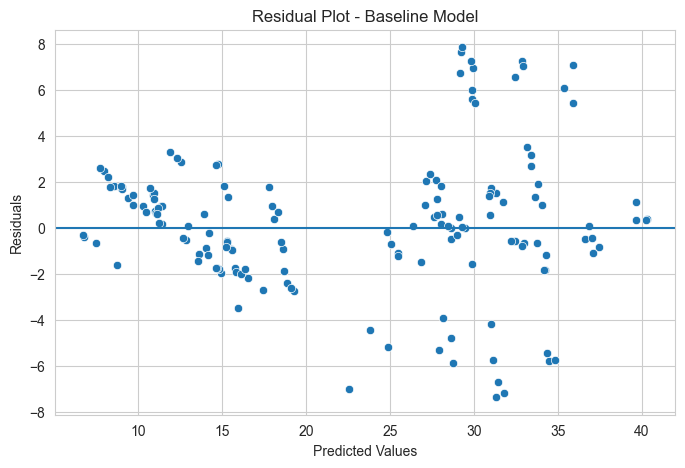

In [15]:
residuals = y_test - y_test_pred

plt.figure()
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Baseline Model")
plt.show()

For smaller and larger predicted I see different trends in the residual (larger errors in the last case). Maybe I should switch to a different type of model taking into account non linearity.

## 4. Polynomial regression(s)

In [16]:
degrees = range(1, 7)

train_rmse_list = []
test_rmse_list = []
train_r2_list = []
test_r2_list = []

for degree in degrees:

    model = Pipeline([
        ("poly", PolynomialFeatures(degree=degree, include_bias=False)),
        ("scaler", StandardScaler()),
        ("linear_regression", LinearRegression())
    ])

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)

    print(f"\nDegree {degree} results:\n")
    print(f"Train RMSE: {train_rmse}; Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}; Test R2: {test_r2}")


Degree 1 results:

Train RMSE: 2.893118785420839; Test RMSE: 3.0254235827736187
Train R2: 0.9170648846622238; Test R2: 0.9121840951546909

Degree 2 results:

Train RMSE: 0.6977417361319165; Test RMSE: 0.8029563871339925
Train R2: 0.995176132996949; Test R2: 0.9938143588850781

Degree 3 results:

Train RMSE: 0.40431183887481376; Test RMSE: 0.5417346207983947
Train R2: 0.9983802841235887; Test R2: 0.9971843803525884

Degree 4 results:

Train RMSE: 0.30847572355957087; Test RMSE: 0.4532624442918442
Train R2: 0.9990571384931342; Test R2: 0.9980289380337579

Degree 5 results:

Train RMSE: 0.2157103250926398; Test RMSE: 0.48899373347146097
Train R2: 0.9995389502517956; Test R2: 0.9977059261621323

Degree 6 results:

Train RMSE: 0.13997001481689536; Test RMSE: 0.9624779917167623
Train R2: 0.9998058774714311; Test R2: 0.9911124425693307


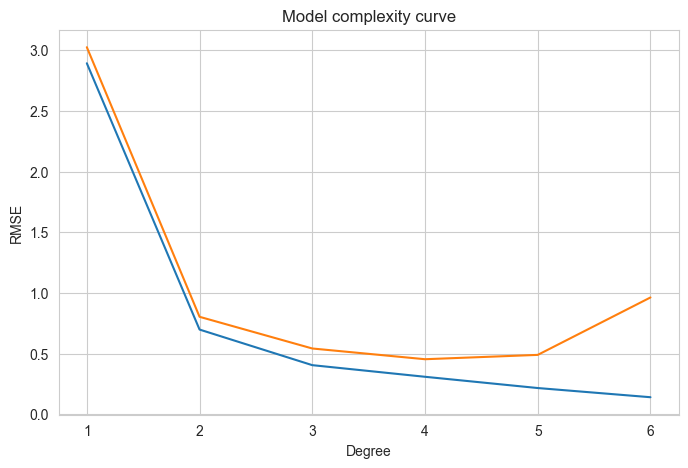

In [17]:
# Model complexity curve

plt.figure()

plt.plot(degrees, train_rmse_list)
plt.plot(degrees, test_rmse_list)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.title("Model complexity curve")
plt.show()

It seems that the best degree is 4, as then the model starts overfitting.

## 5. Test: Degree 6 + Ridge reduces overfitting?

In [21]:
ridge_alphas = [0.001, 0.01, 0.1, 1, 10, 100]

train_rmse_ridge = []
test_rmse_ridge = []

for alpha in ridge_alphas:

    ridge_model = Pipeline([
        ("poly", PolynomialFeatures(degree=6, include_bias=False)),
        ("scaler", StandardScaler()),
        ("ridge", Ridge(alpha=alpha))
    ])

    ridge_model.fit(X_train, y_train)

    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmse_ridge.append(train_rmse)
    test_rmse_ridge.append(test_rmse)

    print(f"\nAlpha {alpha} results:\n")
    print(f"Train RMSE: {train_rmse}; Test RMSE: {test_rmse}")


Alpha 0.001 results:

Train RMSE: 0.27874168962516876; Test RMSE: 0.48294495980909774

Alpha 0.01 results:

Train RMSE: 0.4663537090797055; Test RMSE: 0.6277500731646168

Alpha 0.1 results:

Train RMSE: 0.6915362041845458; Test RMSE: 0.8235952365925722

Alpha 1 results:

Train RMSE: 1.1299057248411322; Test RMSE: 1.2309017199902823

Alpha 10 results:

Train RMSE: 1.750028278655054; Test RMSE: 1.8219678237451638

Alpha 100 results:

Train RMSE: 2.0521222995379467; Test RMSE: 2.1709557643273323


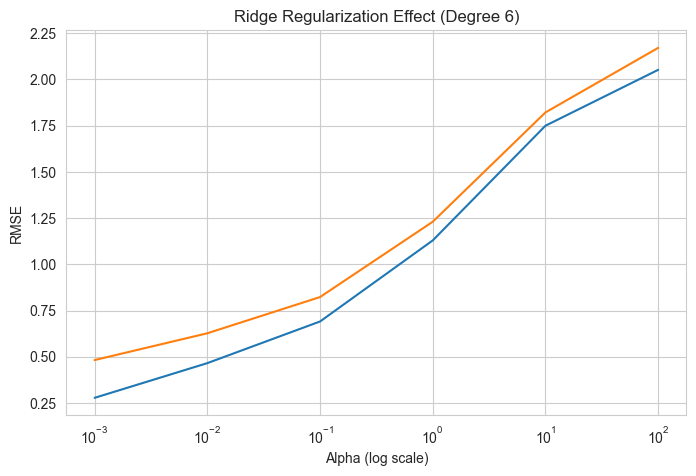

In [22]:
plt.figure()
plt.plot(ridge_alphas, train_rmse_ridge)
plt.plot(ridge_alphas, test_rmse_ridge)
plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("RMSE")
plt.title("Ridge Regularization Effect (Degree 6)")
plt.show()

Considering the cqse with no regularization, even if the error on the training set has slightly increased, the one on the test set has drastically being reduced -> The regularization has prevented overfitting!

In conclusion, the degree 4 is the best solution (RMSE on the test set = 0.45), but also the degree 6 = regularization (RMSE on the test set = 0.48). With respect to them, the linear regression performs worse (RMSE on the test set = 3.02).